In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Iterable

# Using karpathy/micrograd to work with gradients. Thanks Andrej!  
from micrograd.engine import Value

In [2]:
# Generate some clustery-looking data
target_slope = 0.5
target_intercept = 3

np.random.seed(2023)
rng = np.random.default_rng(2023)

X1_c1 = rng.normal(loc=4.0, scale=1.3, size=1000)
X2_c1 = rng.normal(loc=9.0, scale=2.0, size=1000)

X1_c2 = rng.normal(loc=10.0, scale=1.3, size=1000)
X2_c2 = rng.normal(loc=4.0, scale=1.3, size=1000)

X1_c3 = rng.normal(loc=11.0, scale=1.0, size=1000)
X2_c3 = rng.normal(loc=11.0, scale=1.0, size=1000)

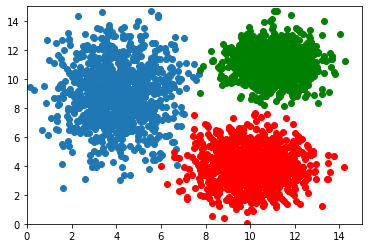

In [3]:
plt.scatter(X1_c1, X2_c1)
plt.scatter(X1_c2, X2_c2, c='red')
plt.scatter(X1_c3, X2_c3, c='green')
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()

In [ ]:
class KMeans:
    def __init__(self, k):
        self.k = k
        self.centroids = []
        
    # Set gradients to zero     
    def zero_grad(self):
        for centroid in self.centroids:
            for coord in centroid:
                coord.grad = 0
        
    # Loss (MSE) for a single target
    def loss(self, 
             Y_true: Iterable,
             Y_pred: Iterable) -> Value:
        result = 0
        for y_true, y_pred in zip(Y_true, Y_pred):
            result += (y_true - y_pred)**2 
        return result
    
    # Use current parameters to produce predictions
    def predict(self, X: Iterable) -> Iterable:
        preds = []
        for x in X:
            y = 0
            if not isinstance(x, list):
                x = [x]
            for idx, val in enumerate(x):
                y += self.coeffs[idx] * val
            y += self.intercept
            preds.append(y)
        y = np.array(y)
        return preds        